In [233]:
import yaml

with open("config.yaml", "r") as y:
    cfg = yaml.safe_load(y)

In [234]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [235]:
dataset = pd.read_csv(cfg["credit_limits"]["dataset"])
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [236]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [237]:
nan_df = dataset.isnull().mean()
nan_df

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [238]:
trash = [
    "CLIENTNUM",
    "Attrition_Flag",
    "Total_Revolving_Bal",                                                                                                                   
    "Avg_Open_To_Buy",                                                                                                                       
    "Total_Amt_Chng_Q4_Q1",
    "Card_Category",                                                                                                                  
    "Total_Trans_Amt",                                                                                                                       
    "Total_Trans_Ct",                                                                                                                        
    "Total_Ct_Chng_Q4_Q1",                                                                                                                   
    "Avg_Utilization_Ratio", 
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
dataset = dataset.drop(trash, axis = 1)
dataset.head()
print(len(dataset.columns))

11


In [239]:
for i in dataset:
    most_popular_value_count = dataset[i].value_counts().iloc[0]
    print(most_popular_value_count/len(dataset))

0.04937296336526118
0.5290806754221389
0.2697738718277871
0.308877258813074
0.4628221585859583
0.35163424508739016
0.2432112175372766
0.22760936111385405
0.379776834205589
0.3337612323491656
0.050162930779105365


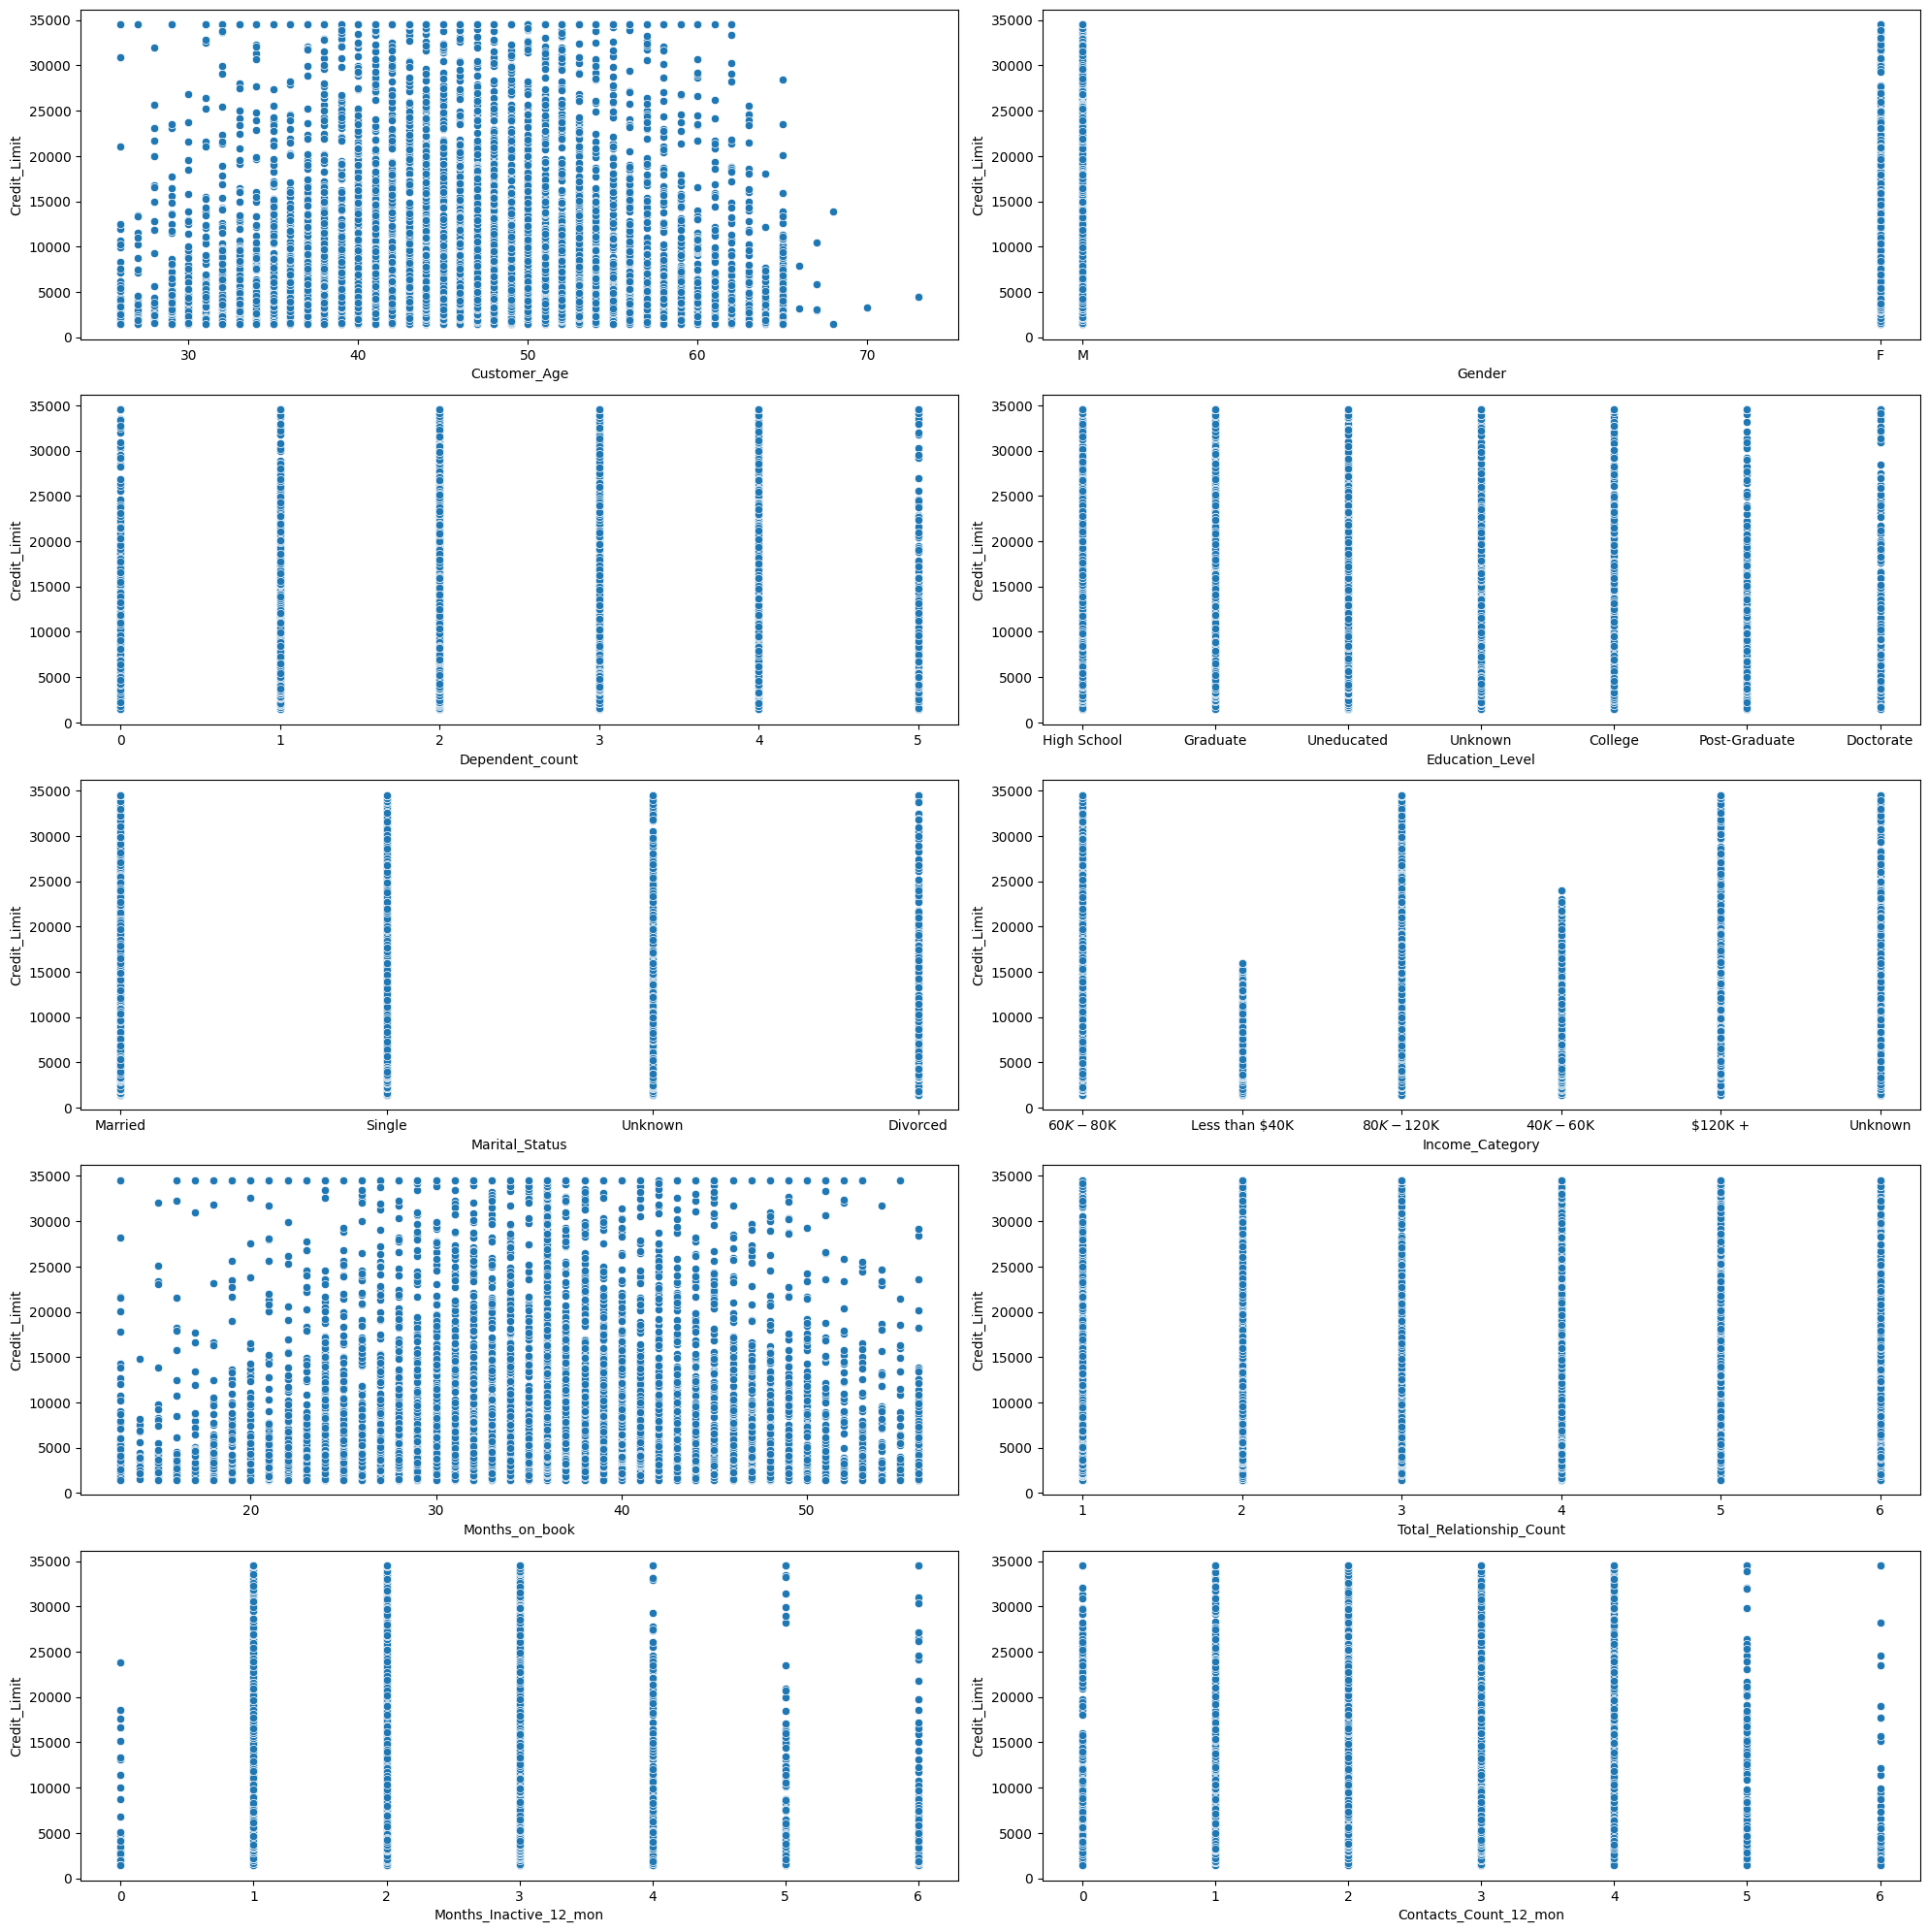

In [240]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(dataset.columns)-1):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=dataset.iloc[:, i],
        y='Credit_Limit',
        data=dataset.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

Избавление от категории Unknown

In [241]:
dataset["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [242]:
dataset["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [243]:
dataset["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [244]:
dataset.count()[0]

10127

-30%

In [245]:
#good idea?
dataset = dataset.drop(dataset[(dataset["Income_Category"] == "Unknown") | (dataset["Marital_Status"] == "Unknown") | (dataset["Education_Level"] == "Unknown")].index)
dataset.count()[0]

7081

In [246]:
dataset = dataset.drop(dataset[dataset["Customer_Age"] > 65].index)
dataset.count()[0]

7074

In [247]:
dataset.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0
1,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0
2,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0
4,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0
5,44,M,2,Graduate,Married,$40K - $60K,36,3,1,2,4010.0


# Выбор метода для категориальных перем.
Label enc - слишком просто. 
One hot enc - нагрузка на dim модель. 
Target enc - data leak. 
Frequency enc - хороший вариант. 

In [248]:
import category_encoders as ce

count_encoder = ce.CountEncoder(normalize=True)
dataset["Gender"] = count_encoder.fit_transform(dataset["Gender"])
dataset["Education_Level"] = count_encoder.fit_transform(dataset["Education_Level"])
dataset["Marital_Status"] = count_encoder.fit_transform(dataset["Marital_Status"])
dataset["Income_Category"] = count_encoder.fit_transform(dataset["Income_Category"])
dataset.head()

KeyError: 'Card_Category'

In [ ]:
target = "Credit_Limit"
features = list(dataset.columns)
features.remove("Credit_Limit")
features

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Подготовка для использования Lasso

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset[features]
y = dataset[[target]]
x_train, x_test, y_train, y_test = train_test_split(x.values,y.values.reshape(-1),train_size=0.8,shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=1)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9977798378990534

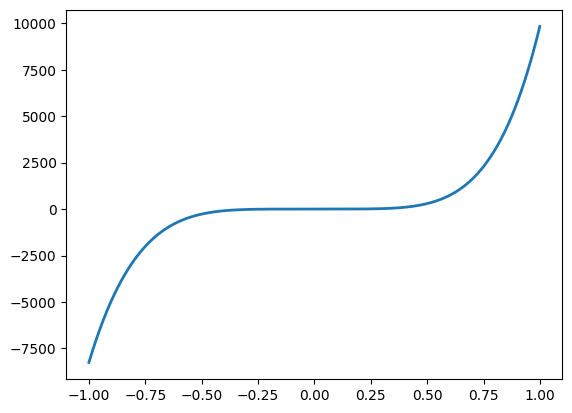

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    val = 0
    for i in range(len(clf.coef_)):
        val += pow(x,i)*clf.coef_[len(clf.coef_)-i-1]
    return val

gx = np.arange(-1,1,0.001)
gy = list(map(f,gx))
plt.plot(gx, gy, linewidth=2)
plt.show()